Calling All Autobots

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure

Function for histogram matching

In [2]:
# Function for histogram matching
def histogram_matching(source, template):
    matched = exposure.match_histograms(source, template, channel_axis=None)
    return matched

Dataset

In [3]:
image1 = 'Images/training/drishtiGS_017.png'
image2 = 'Images/training/drishtiGS_032.png'
image3 = 'Images/training/drishtiGS_036.png'
image4 = 'Images/training/drishtiGS_037.png'
image5 ='Images/training/drishtiGS_040.png'
image6 = 'Images/training/drishtiGS_042.png'
image7 = 'Images/training/drishtiGS_049.png'
image8 = 'Images/training/drishtiGS_057.png'
image9 = 'Images/training/drishtiGS_060.png'
image10 = 'Images/training/drishtiGS_063.png'
image11 = 'Images/training/drishtiGS_064.png'
image12 = 'Images/training/drishtiGS_066.png'
image13 = 'Images/training/drishtiGS_068.png'
image14 = 'Images/training/drishtiGS_069.png'
image15 = 'Images/training/drishtiGS_080.png'
image16 = 'Images/training/drishtiGS_081.png'
image17 = 'Images/training/drishtiGS_084.png'
image18 = 'Images/training/drishtiGS_088.png'
image19 = 'Images/training/drishtiGS_094.png'
image20 = 'Images/training/drishtiGS_098.png'

# Buat list yang berisi semua variabel gambar
images = [
    image1, image2, image3, image4, image5,
    image6, image7, image8, image9, image10,
    image11, image12, image13, image14, image15,
    image16, image17, image18, image19, image20
]

Read reference image

In [4]:
# Read reference image and input image
reference_image_path = 'Images/training/drishtiGS_037.png'
# Load the images
reference_image = cv2.imread(reference_image_path)
# Convert images to grayscale
gray_reference = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)


Iterasi 20 Gambar

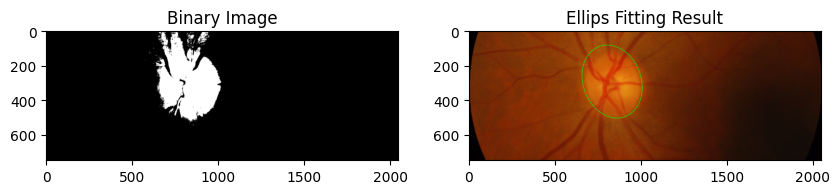

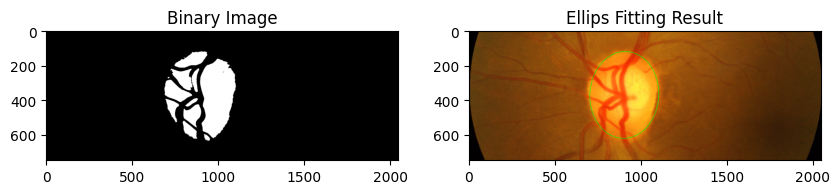

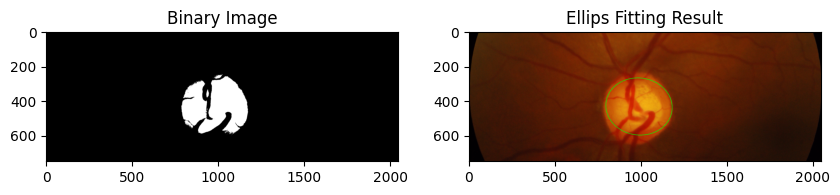

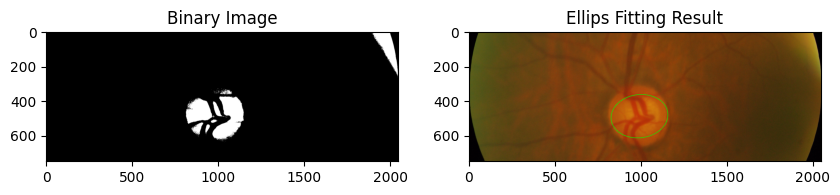

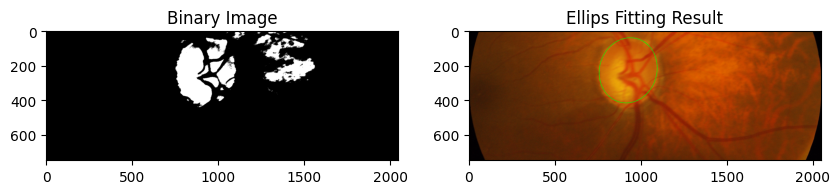

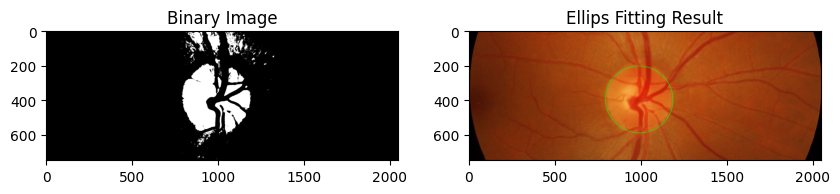

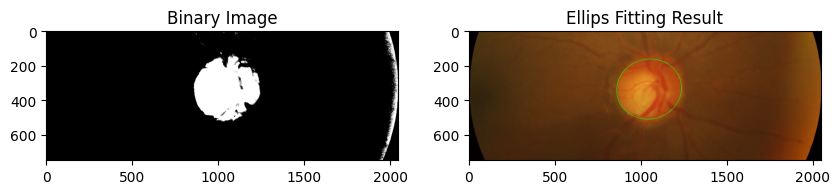

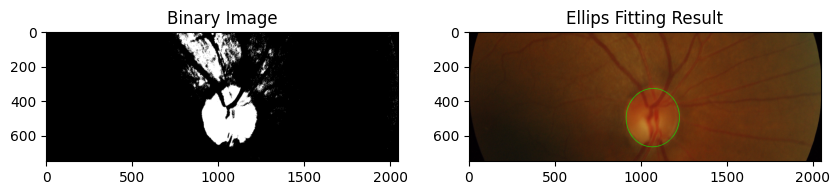

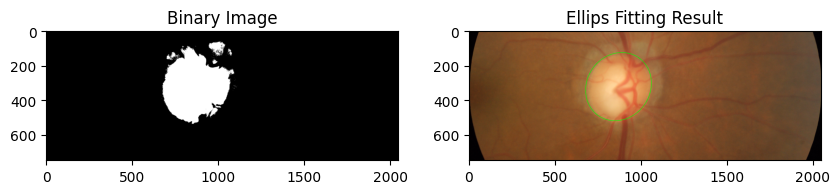

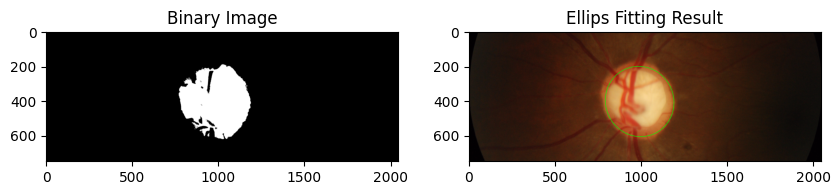

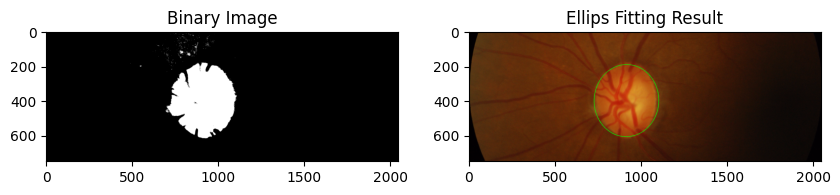

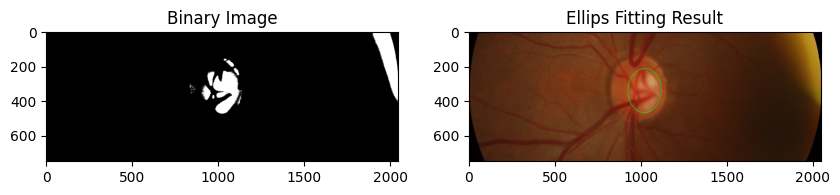

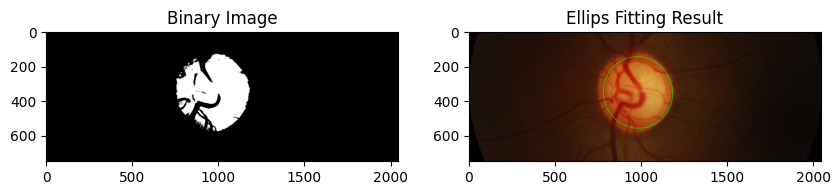

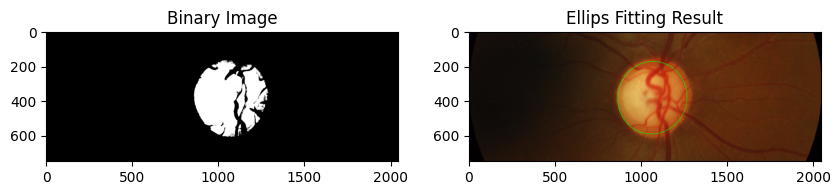

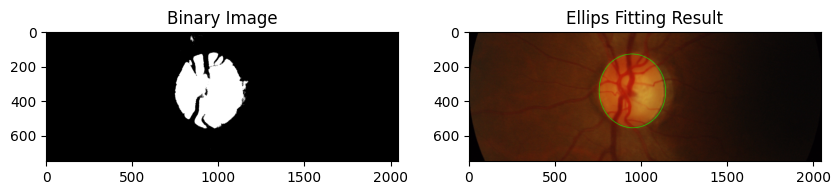

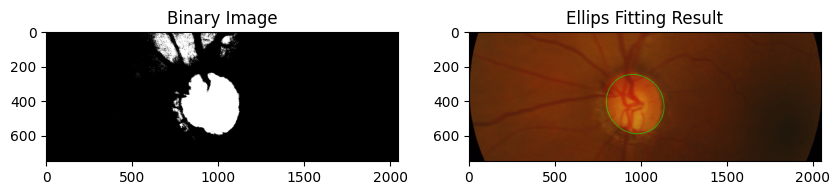

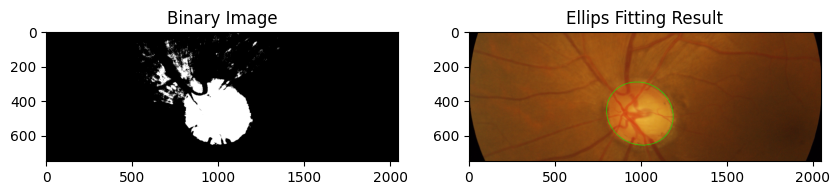

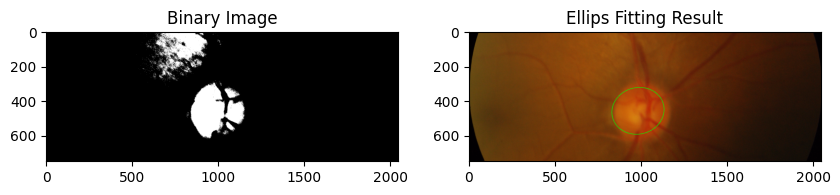

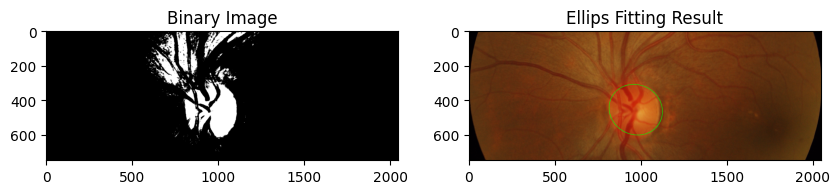

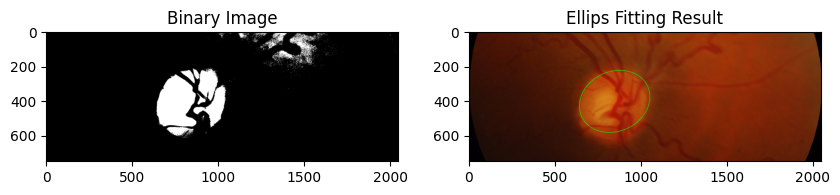

In [13]:
for image in images:
    fundus_image = cv2.imread(image)

    gray_image = cv2.cvtColor(fundus_image, cv2.COLOR_BGR2GRAY)
    # Perform histogram matching
    matched_image = histogram_matching(gray_image, gray_reference)
    # Get the dimensions of the image
    height, width, _ = fundus_image.shape

    # Crop the image along the y-axis from 550 to 1300
    # Taking the entire width for x-axis
    fundus_cropped = matched_image[550:1300, 0:width]
    RGB_cropped = fundus_image[550:1300, 0:width]

    # Apply thresholding
    _, binary_image = cv2.threshold(fundus_cropped, 100, 255, cv2.THRESH_BINARY)
    # Perform morphological opening
    kernel_open = np.ones((20, 20), np.uint8)
    opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel_open)
    # Perform morphological closing
    kernel_close = np.ones((100, 100), np.uint8)
    closed_image = cv2.morphologyEx(opened_image, cv2.MORPH_CLOSE, kernel_close)
    
    # Convert closed_image to grayscale if it's not already in grayscale
    if len(closed_image.shape) > 2:
        closed_image_gray = cv2.cvtColor(closed_image, cv2.COLOR_BGR2GRAY)
    else:
        closed_image_gray = closed_image

    # Ensure the image is in the correct format (CV_8UC1)
    closed_image_uint8 = np.uint8(closed_image_gray)
    # Find contours
    contours, _ = cv2.findContours(closed_image_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if not contours:
        raise ValueError("No contours found in the image")

    # Get the largest contour
    largest_contour = max(contours, key=cv2.contourArea)
    # Get the bounding rectangle of the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Ensure the crop area is within the image bounds
    y1, y2 = max(0, y-30), min(fundus_cropped.shape[0], y+h+30)
    x1, x2 = max(0, x-30), min(fundus_cropped.shape[1], x+w+30)

    # Crop the image to the bounding rectangle
    optic_disc_cropped = fundus_cropped[y1:y2, x1:x2]
    optic_disc_RGB = RGB_cropped[y1:y2, x1:x2]
    # Draw the contours on the original image
    contour_image = fundus_cropped.copy()
    cv2.drawContours(contour_image, [largest_contour], -1, (0, 255, 0), 2)

    # Convert RGB_cropped to RGB format
    color_image = cv2.cvtColor(RGB_cropped, cv2.COLOR_BGR2RGB)

    # Menemukan kontur
    contours, _ = cv2.findContours(closed_image_uint8, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Pastikan ada kontur yang ditemukan
    if len(contours) > 0:
        # Ambil kontur terbesar (diasumsikan sebagai optic disc)
        largest_contour = max(contours, key=cv2.contourArea)
    
        # Fit ellipse ke kontur terbesar
        if len(largest_contour) >= 5:  # Minimum number of points required to fit ellipse
            ellipse = cv2.fitEllipse(largest_contour)
        
            # Gambar ellips ke gambar warna dengan warna merah (RGB: (255, 0, 0))
            cv2.ellipse(color_image, ellipse, (0, 255, 0), 2)
        
            # Tampilkan hasil
            plt.figure(figsize=(10, 10))
            plt.subplot(1, 2, 1)
            plt.title('Binary Image')
            plt.imshow(binary_image, cmap='gray')
        
            plt.subplot(1, 2, 2)
            plt.title('Ellips Fitting Result')
            plt.imshow(color_image)
            plt.show()
        else:
            print("Kontur tidak cukup poin untuk fitting ellips.")
    else:
        print("Tidak ada kontur yang ditemukan.")

SHOW SHOW SHOW

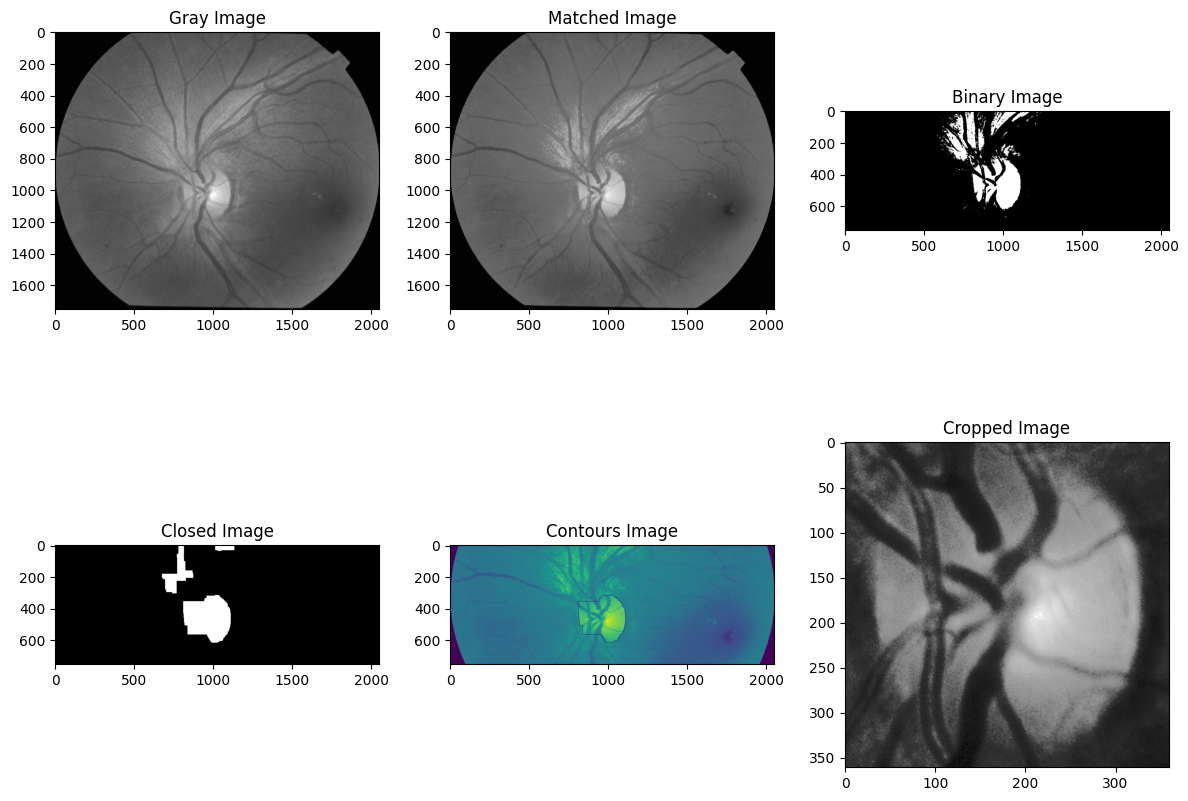

In [ ]:
# Create a subplot with 3 rows and 2 columns
plt.figure(figsize=(12, 10))

# Plot the original image
plt.subplot(2, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')

# Plot the gray image
plt.subplot(2, 3, 2)
plt.imshow(matched_image, cmap='gray')
plt.title('Matched Image')

# Plot the binary image
plt.subplot(2, 3, 3)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')

# Plot the closed image
plt.subplot(2, 3, 4)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')

# Add these lines after drawing contours and cropping images

# Plot the contours image
plt.subplot(2, 3, 5)
plt.imshow(contour_image)#cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours Image')

# Plot the cropped image
plt.subplot(2, 3, 6)
plt.imshow(optic_disc_cropped, cmap='gray')
plt.title('Cropped Image')

plt.tight_layout()
plt.show()